<h1 style="color:red" align="center">Neural Networks: The basics made for all</h1>
<p align="center">By Bastien Lhopitallier and Robin Sobczyk</p>

<h2 align="center"> Overall summary </h2>

In order to follow this course, you need:
- an understanding of basic mathematics (derivatives, compositions, gradients, usual functions, linear algebra)
- a computer on which you can run Python
- an understanding of Python codes and the ability to code in Python

To get started, ensure that you have:
- Python in version 3.9, 3.10 or 3.11 (later versions have not been tested)
- Graphviz installed
- run `pip install -r ./requirements.txt` (potentially in a virtual environment if needed)

To install graphviz :
1. ensure you have a C/C++ compiler installed.  
    Usually, MacOS and Linux systems come with such a compiler by default. For Windows, you might need to install [Microsoft Visual C++ Build Tools](https://visualstudio.microsoft.com/visual-cpp-build-tools/)
2. for Linux :  
    `sudo apt install graphviz graphviz-dev` or `sudo dnf install graphviz graphviz-devel` according to your system  

    for MacOS:  
    `brew install graphviz` or `port install graphviz` according to your system  
    
    for Windows :  
    Download and install 2.46.0 for Windows 10 (64-bit):
   [stable_windows_10_cmake_Release_x64_graphviz-install-2.46.0-win64.exe](https://gitlab.com/graphviz/graphviz/-/package_files/6164164/download)  
   Make sure to tick the box to export the paths !

Graphviz is required to install pygraphviz. If you run in any other problems installing pygraphviz, please refer to the [official installation guide](https://github.com/pygraphviz/pygraphviz/blob/main/INSTALL.txt) and the underlying github repository.

After this series of courses, you will know:
- what is an artificial neuron and how it is linked to biological neurons
- what is a neural network
- the main different types of neural networks
- how to train neural networks, and what the different options for training are
- how to code a neural network from scratch
- how to code your first neural network with PyTorch and train it
- how to create and read the computational flow of a neural network
- how to debug your neural network through gradient inspection
- what the risks and limits of neural networks are
- how to run basic analysis of the activations with heatmaps
- the ethical concerns raised by deep learning

The last course is meant to deepen your knowledge and is more of a gallery of usual models, tricks and directions to explore rather than a course in itself.

<h2 style="color:green" align="center">Course 0: Introduction</h2>

In this course, you will learn:
- what an artificial neuron is and how it is linked to biological neurons
- how to assemble artificial neurons and what is an artificial neural network
- the different types of networks and the quick overview of their use cases

<h3 style="color:skyblue">From biological to artificial neurons</h3>

Neurons are the core cells of our brains and nervous system. They are responsible for the information processing in our body, whether through thoughts or reflexes.

<div style="max-width:800px;margin-right: auto; margin-left: auto;">

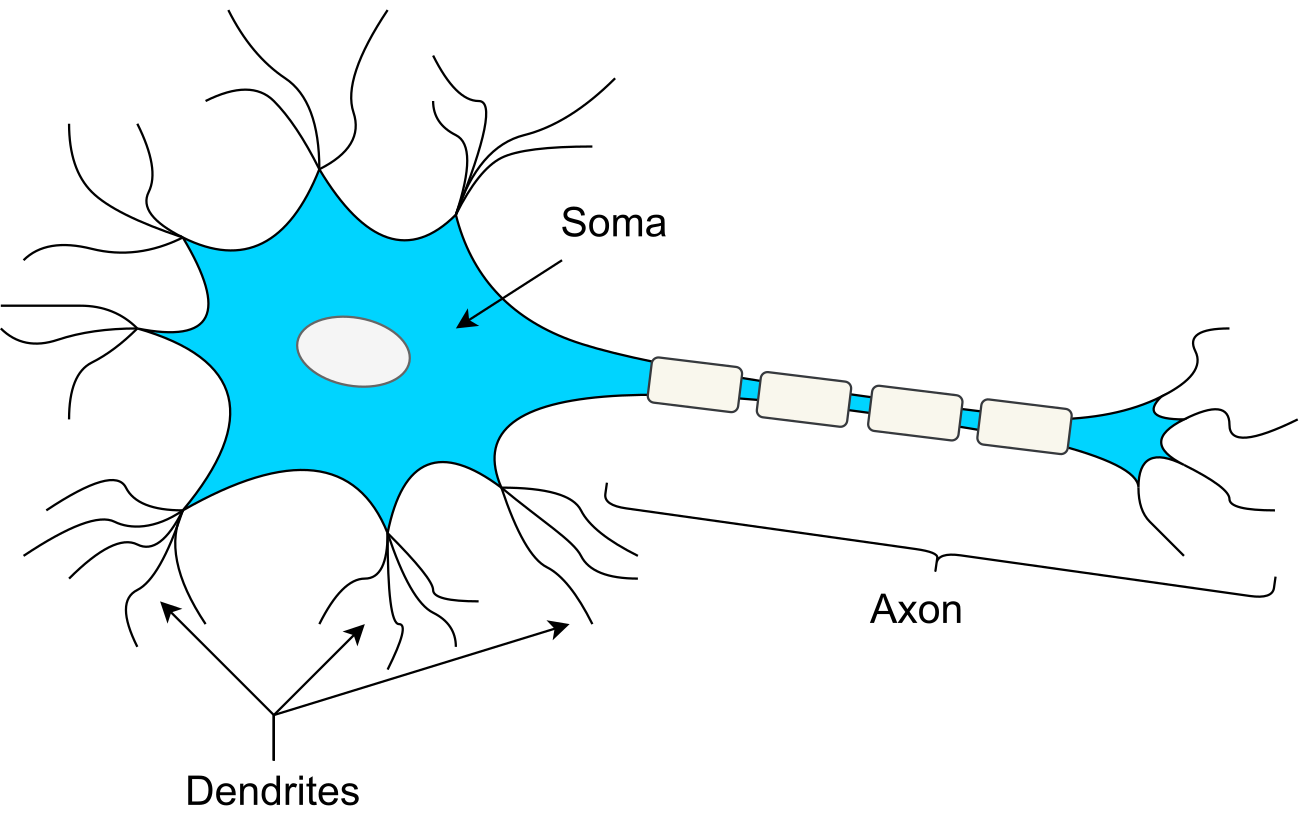

</div>

They are made up of three main parts:
- the body, which is called the *soma*, and contains the nucleus
- the *axon*, which is the main branch of the cell
- *dendrites*, which are the other branches

In a very very (very!) simplified way, dendrites are in charge of receiving information, the soma receives information from the dendrites and processes them, and the axon is meant to transmit the processed information to other neurons. A connection between two neurons is called a *synapse*, and there are two types of synapse:
- *inhibitory*, if the message is meant to prevent the receiving neuron from firing an information
- *excitatory*, if the message is meant to encourage the receiving neuron to transmit information

In an effort to provide a theoretic framework to the study  of neural activity, [McCulloch and Pitts](https://doi.org/10.1007/BF02478259) introduced the first model of artificial neurons in 1943. This model can be represented as follow:

<div style="max-width:400px;margin-right: auto; margin-left: auto;">

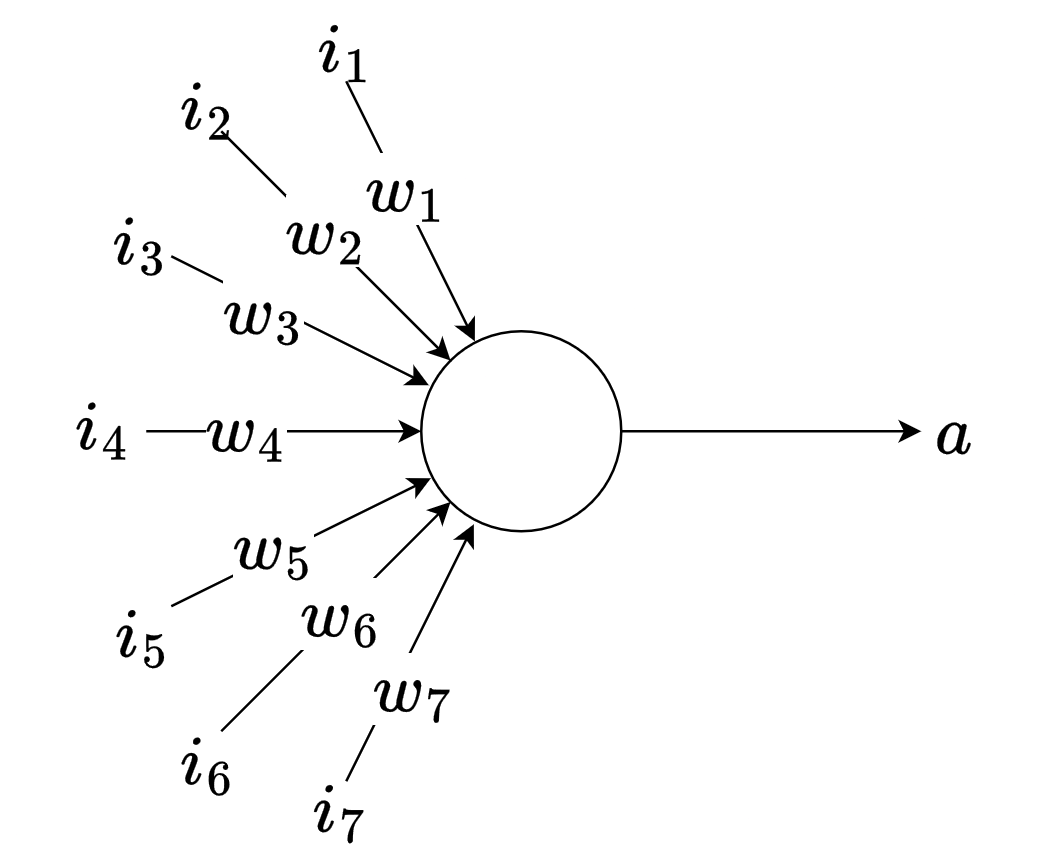

</div>

In this picture, the soma is the circle at the middle, the axon is the output on the right, and the dendrites are the inputs on the left. Weights are added on the dendrites to take into account biological effects like synapse sensitivity or synapse type.

The signals in this model were originally meant to be binary, because biological neurons either fire or stay silent. Still, with simplifications, biological neurons fire if the sum of the received (weighted) signals is over a threshold which we will denote $\theta$.

Hence, the formula for the activity of a neuron is $$a=\left\lbrace\begin{matrix}1 & \textnormal{if }\sum\limits_{j=1}^n w_ji_j \geq \theta\\ 0 & \textnormal{otherwise}\end{matrix}\right.$$

In order to simplify this equation, let $W=\begin{pmatrix}w_1\\\vdots\\ w_n\end{pmatrix}$, $I=\begin{pmatrix}i_1\\\vdots\\ i_n\end{pmatrix}$ and $\textnormal{thresh}_\theta: x\mapsto\left\lbrace\begin{matrix}1 & \textnormal{if }x \geq \theta\\ 0 & \textnormal{otherwise}\end{matrix}\right.$  
then, you have
$$a=\textnormal{thresh}_\theta(W^\top I)$$
It can be further simplified based on the fact that $\textnormal{thresh}_\theta(x)=\textnormal{thresh}_0(x-\theta)$. $\textnormal{thresh}_0$ is also known as the Heaviside step function, and denoted by $H$. You finally have
$$a=H(W^\top I-\theta)$$

<h3 style="color:skyblue">Assembling neurons together</h3>

Assembling neurons is quite simple. It is done the same way as in the brain: you connect dendrites to axons.

<div style="max-width:500px;margin-right: auto; margin-left: auto;">



</div>

As shown above, the axon emits an unweighted signal, and the weights are located on the dendrites. You can simplify this visual notation and hide the weights. However, to account for the fact that several dendrites can receive the signal from one single axon, these different transmissions can be represented by multiple arrows, one per dendrite.

<div style="max-width:350px;margin-right: auto; margin-left: auto;">



</div>

Once one neuron is connected to several other neurons, the most basic neural neutral is formed: several neurons which communicate.
The neurons can be organized in layers.

<div style="max-width:400px;margin-right: auto; margin-left: auto;">

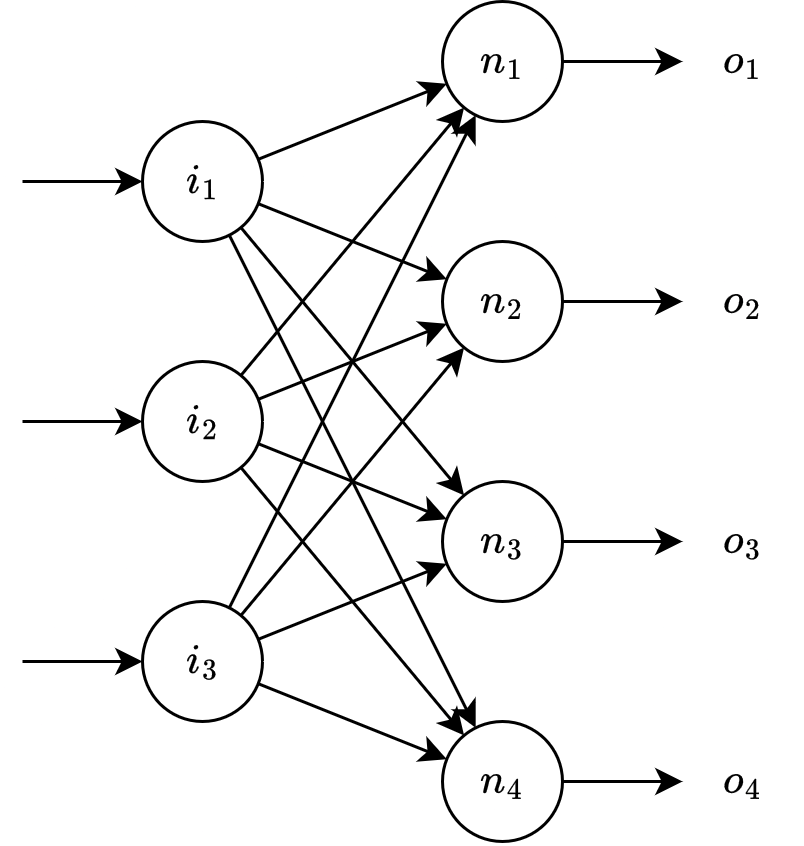

</div>

In this layer,  multiple neurons extract information from input nodes/neurons. It is common that inputs (nodes $i_1$ to $i_3$) are represented as neurons which only transmit information without processing it. That is not the case for output, however (labels $o_1$ to $o_4$).

Now, let $W_{(i)}$ and $\theta_{(i)}$ be the parameters of the neuron $n_i$, $I=\begin{pmatrix}i_1\\\vdots\\ i_n\end{pmatrix}$ and $O=\begin{pmatrix}o_1\\\vdots\\ o_m\end{pmatrix}$.

As mentioned in the first part of this course, you have $o_i=H(W_{(i)}^\top I-\theta_{(i)})$. If $H$ now generalizes to vectors by being applied component-wise, you have :
$$\begin{pmatrix}o_1\\\vdots\\ o_m\end{pmatrix}=H\left(\begin{pmatrix}W_{(1)}^\top\\\hline \vdots\\\hline W_{(m)}^\top\end{pmatrix}I-\begin{pmatrix}\theta_{(1)}\\\vdots\\ \theta_{(m)}\end{pmatrix}\right)$$

Let $\widetilde{W}=\left(\begin{array}{c|c|c}& & \\ W_{(1)} & \cdots & W_{(m)}\\ & & \end{array}\right)$ be the matrix containing the weights of the neurons of the layer, and $\widetilde{\theta}=\begin{pmatrix}\theta_{(1)}\\\vdots\\ \theta_{(m)}\end{pmatrix}$ be the vector of all the thresholds. Then you can write, for the layer, this time :
$$O=H\left(\widetilde{W}^\top I-\widetilde{\theta}\right)$$

<div style="max-width:500px;margin-right: auto; margin-left: auto;">



</div>

You can also add another layer to get:

$$O=H\left(\widetilde{W}_2^\top H\left(\widetilde{W}_1^\top I-\widetilde{\theta}_1\right)-\widetilde{\theta}_2\right)$$

<div style="max-width:600px;margin-right: auto; margin-left: auto;">

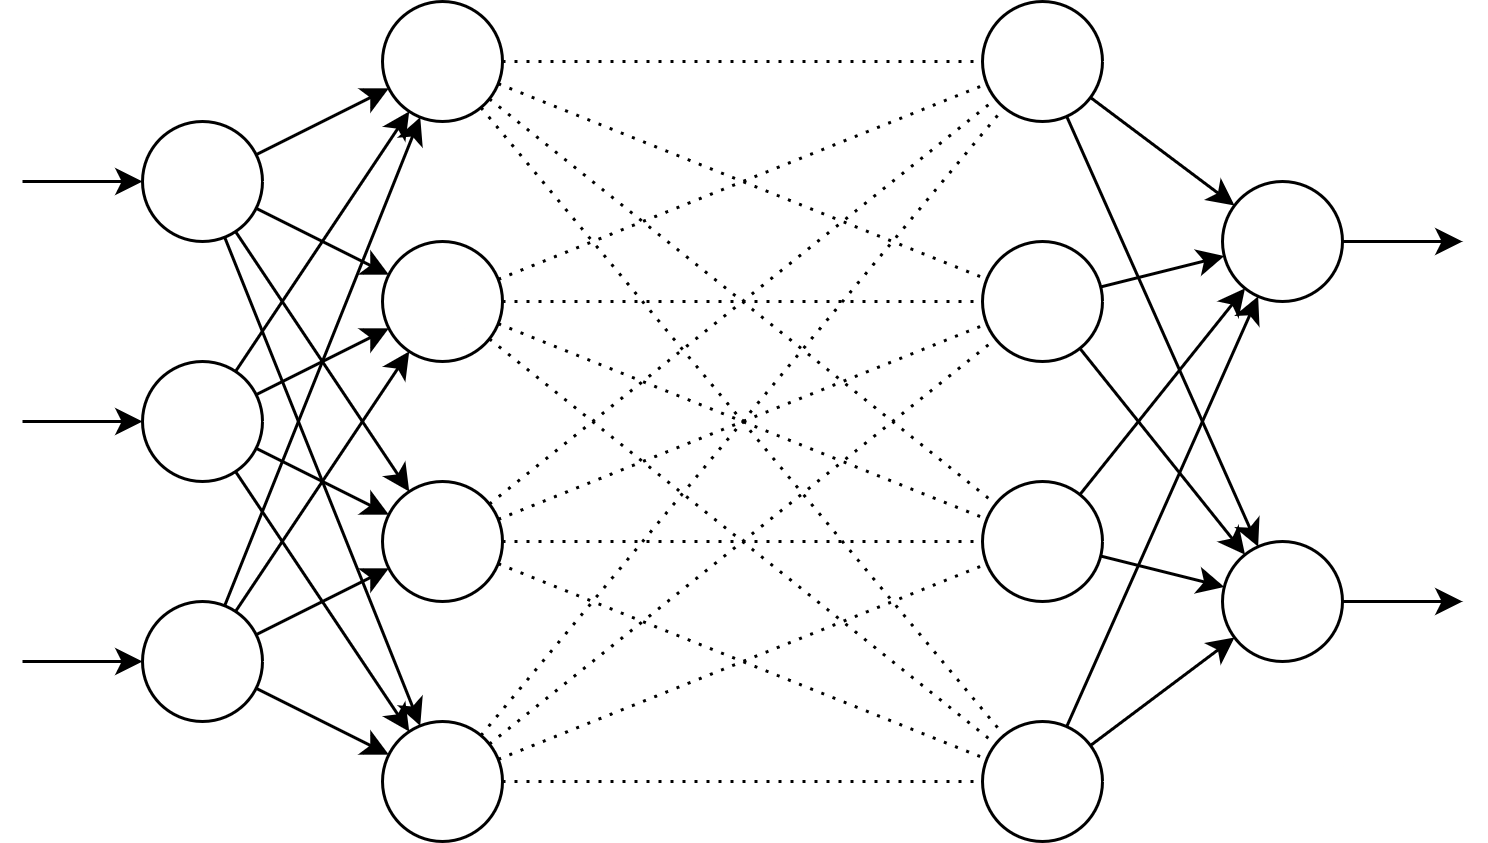

</div>

It is possible to add as many layers as you want, as shown here by the dashed lines. This is what is called a deep neural network. The output is not the result of applying only one layer to the input, because there are *hidden layers* in between. Indeed, layers can vary in width through the network.

Also, every neuron of one layer is connected to every neuron of the next layer, and this is called a *dense* or *fully-connected* network.

Furthermore, we can notice that in the example here, the information only goes one way, as no information is fed back to precedent neurons. Such networks are called feed-forward networks.

On the opposite, networks where loops exist is called a Recurrent Neural Network (RNNs). The length of these loops can vary, as a neuron can feed back to itself but it can also feed back to a neuron that is several layers before; For the sake of simplicity, RNNs will not be presented in depth before Course 5, although they might be mentionned.

<h3 style="color:skyblue">Generalisation of artificial neurons and layers</h3>

All that was said previously is a description of neurons called Threshold Logic Units (TLUs):
- Threshold because they activate with respect to a threshold
- Logic because they works only with boolean values (0 or 1)

It is possible to generalize artificial neurons much further. First, we need to separate the two steps of TLU computation:
1. Information aggregation: computing $W^\top I-\theta$
2. Activation: thresholding the aggregated information

Also, remember that $W$ and $\theta$ are parameters which are tied to the neuron. Let $\Theta$ encompass all those weights.

Also, let $s$ be the *activation function* and $f$ the *preactivation function*. You then have in general:
$$a=s(f(I,\Theta))$$

Usually, $f$ is linear (a linear transformation, a convolution) and $s$ is non-linear (sigmoid, ReLU, tanh, step, etc). This is the generalized framework of artificial neurons. The neuron can now work on any input space supported by $f$.

Furthermore, it happens that layers cannot be decomposed as single cells due to interdependence in the preactivation function (e.g. normalization), and that the activation cannot be separated from the preactivation function (e.g. softmax). In this case, we talk about *layer functions*, and, if relevant, about *layer activation and preactivation functions*, and the *number of units/neurons* is the dimension of the output of the layer.

Note that there is no consensus on how to break layers into individual neurons when they are not linear units, and that the meaning of these terms may fluctuate.

All that being said, Linear Networks are networks that we already described previously, but they work with inputs extended to the real numbers. Those networks are mostly used for regression on and classification of unstructured numerical data.

Setting a convolution as the layer function will result in Convolutionnal Neural Networks (CNNs). Those networks are mostly useful to process data twhich can be meaningfully represented as pictures.

Adding feedback loops to a network will provide a way for the network to keep information from one iteration to another, creating a slight effect of memory.

Neural Networks are very flexible, and can be used for a variety of tasks, such as regression (finding a good model for data), classification (putting data into categories), transformation (extracting information, applying filters etc.), prediction (next word prediction, action prediction for agents) etc.